https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

XGBoost stands for eXtreme Gradient Boosting. The library is laser focused on computational speed and model performance

The XGBoost library implements the gradient boosting decision tree algorithm. Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made

Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

This approach supports both regression and classification predictive modeling problems.


In [69]:
from sklearn import datasets
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [70]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [71]:
X[:3]
X.shape
y[:2]
y.shape

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

(150, 4)

array([0, 0])

(150,)

In [72]:
np.unique(y) # 3 classes

array([0, 1, 2])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape
X_test.shape

(120, 4)

(30, 4)

In [74]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)


In [75]:
# xgb.DMatrix?

In [76]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations
# the eta parameter gives us a chance to prevent this overfitting

In [77]:
model = xgb.train(param, D_train, steps)

In [78]:
model

In [79]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9743589743589745
Recall = 0.9583333333333334
Accuracy = 0.9666666666666667


In [80]:
preds[:2]
np.argmax([0.00397916, 0.00534278, 0.9906781 ])
np.argmin([0.9873663 , 0.00928136, 0.00335236])

array([[0.00354971, 0.00469893, 0.9917514 ],
       [0.00378494, 0.00501032, 0.9912047 ]], dtype=float32)

2

2

In [82]:
np.unique(best_preds)

array([0, 1, 2])

In [85]:
X_test[:3]
X_test.shape
model.feature_names

array([[7.7, 3. , 6.1, 2.3],
       [6.5, 3. , 5.2, 2. ],
       [5. , 3.4, 1.6, 0.4]])

(30, 4)

['f0', 'f1', 'f2', 'f3']

The gamma parameter can also help with controlling overfitting. It specifies the minimum reduction in the loss required to make a further partition on a leaf node of the tree. I.e if creating a new node doesn’t reduce the loss by a certain amount, then we won’t create it at all.

The booster parameter allows you to set the type of model you will use when building the ensemble. The default is gbtree which builds an ensemble of decision trees. If your data isn’t too complicated, you can go with the faster and simpler gblinear option which builds an ensemble of linear models.

In [52]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)

/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [20]:
model.dump_model('dump.raw.txt')

In [60]:
model.feature_names
model

['f0', 'f1', 'f2', 'f3']

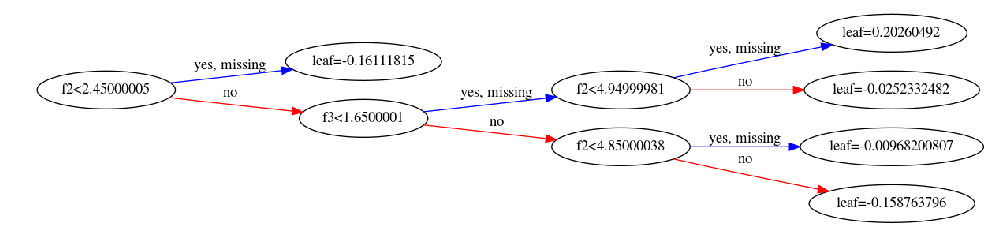

In [91]:
# visualize the first tree using DOT language, f2 means the third feature
# X has four features, f0, f1, f2, f3, but why the leaves are not always equal to 3? should it not be just 3 classes?
# what are the values in the leaves?
# This is a 3 classes classification problem, why do I see 5 leaves?

f, ax = plt.subplots(figsize=(14, 6))
xgb.plot_tree(model, num_trees=10, rankdir='LR', ax=ax)
plt.tight_layout()
plt.show()

In [55]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9523809523809524
Recall = 0.9444444444444445
Accuracy = 0.9333333333333333


In [56]:
model